In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# choose whether to load dataset with pickle or hdf5 files (using hickle)
use_pickle = True

data_root = '../data'

if use_pickle:
    import pickle
    data_path = "dataset_pickle"
    file_ext = "pickle"
else:
    import hickle
    data_path = "dataset_h5"
    file_ext = "h5"

data_path = os.path.join(data_root, data_path)

In [3]:
def load_shot(shotno):
    with open(os.path.join(data_path, f"{shotno}.{file_ext}"), "rb") as f:
        if use_pickle:
            return pickle.load(f)
        else:
            return hickle.load(f)
        
def load_label(shotno):  
    with open(os.path.join(os.path.join(data_root, 'MHD_labels'), f'TCV_{shotno}_apau_MHD_labeled.csv')) as f:
        data = np.loadtxt(f, skiprows=1, delimiter=',')

        label_time = data[:, 0]
        labels = data[:, 4]

        return {'time': label_time,
                'label': labels}

In [4]:
# get all shot nos
all_shots = [int(os.path.basename(x.split(f".{file_ext}")[0])) 
             for x in glob.glob(os.path.join(data_path, f"*.{file_ext}"))]
if len(all_shots) < 94:  # check if all data is there
    print(f"[using dataset mode {'pickle' if use_pickle else 'hdf5'}]")
    raise ValueError(f"Not all shots found in path /{data_path}/; found only {len(all_shots)} out of 94")

In [5]:
shotno = all_shots[70]
shotno = 64374
data_shot = load_shot(shotno)

label = load_label(shotno)

In [18]:
inputs = data_shot["x"]["spectrogram"]
spec_even = inputs["EvenN"]
spec_odd = inputs["OddN"]
f = inputs["frequency"]
t_spec = inputs["time"]

t_mode = data_shot["y"]["modes"]["time"]

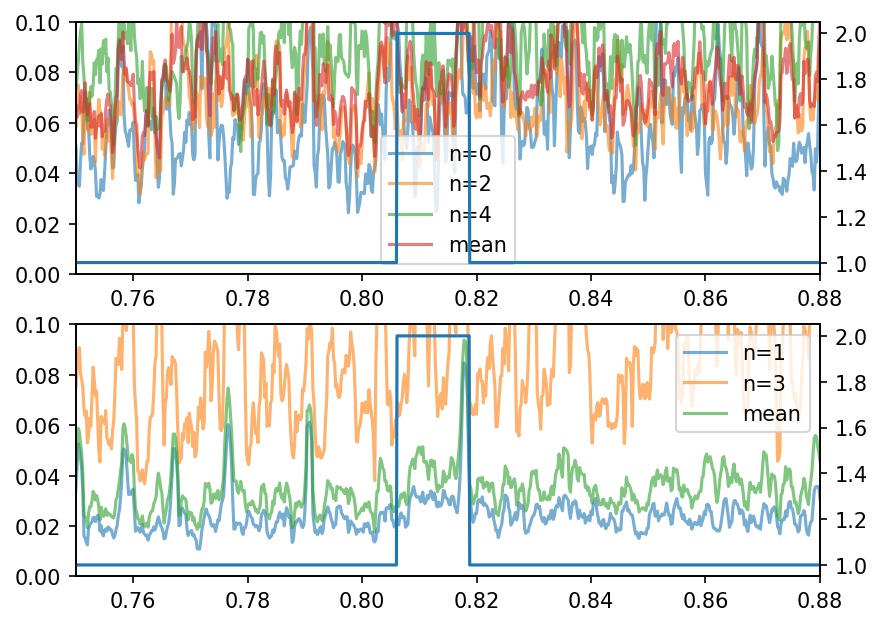

In [6]:
fig, axs = plt.subplots(2)
fig.set_dpi(150)

for i in range(5):
    data = data_shot["y"]["modes"][f"N{i}"]
    if i % 2 == 0:
        axs[0].plot(t_mode, (data - np.nanmin(data)) /np.nanmax(data), label=f"n={i}", alpha=0.6)
    else:
        axs[1].plot(t_mode, (data - np.nanmin(data)) /np.nanmax(data), label=f"n={i}", alpha=0.6)
        
odd_mean = (data_shot["y"]["modes"]["N1"] +  data_shot["y"]["modes"]["N3"])/2
axs[1].plot(t_mode, (odd_mean - np.nanmin(odd_mean)) /np.nanmax(odd_mean), label='mean', alpha=0.6)

even_mean = (data_shot["y"]["modes"]["N0"] +  data_shot["y"]["modes"]["N2"] + data_shot["y"]["modes"]["N4"])/3
axs[0].plot(t_mode, (even_mean - np.nanmin(even_mean)) /np.nanmax(even_mean), label='mean', alpha=0.6)



for ax in axs:
    ax1 = ax.twinx()
    ax1.plot(label['time'], label['label'])

    ax.legend()
    ax.set_xlim(0.75, 0.88)
    ax.set_ylim(0, 0.1)

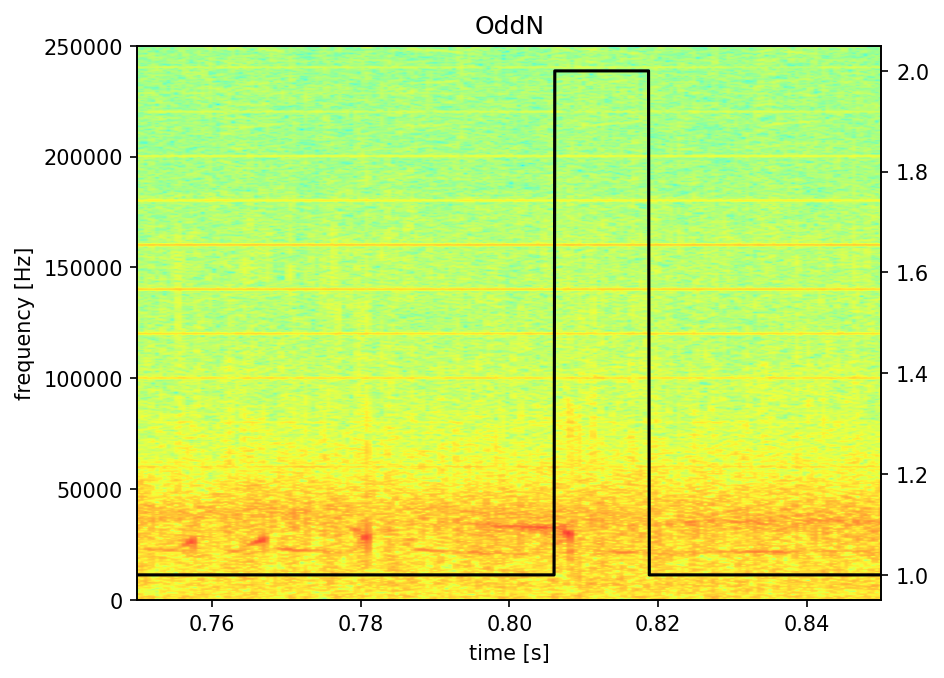

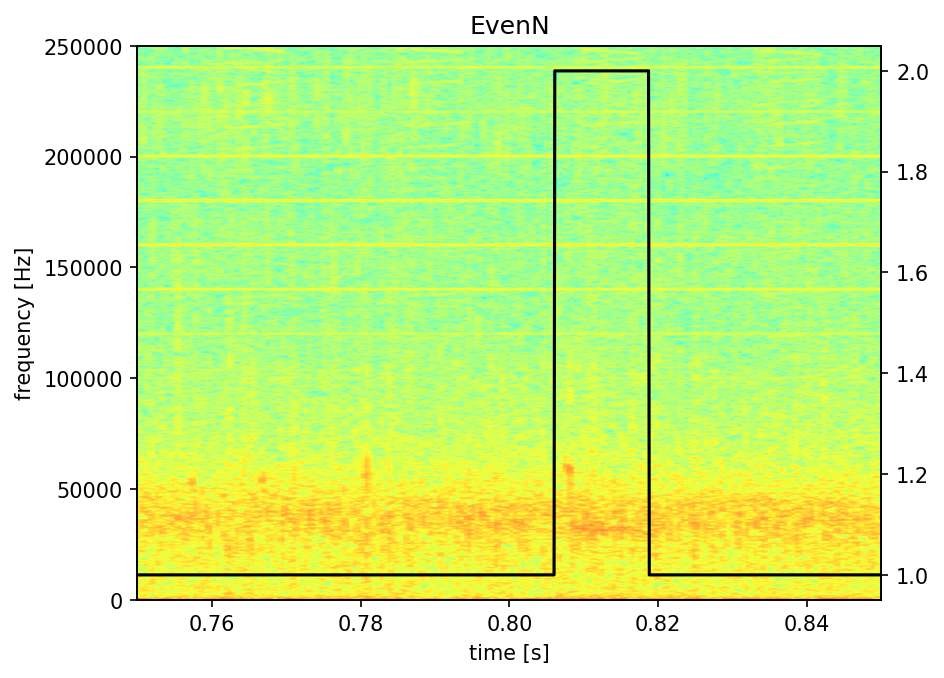

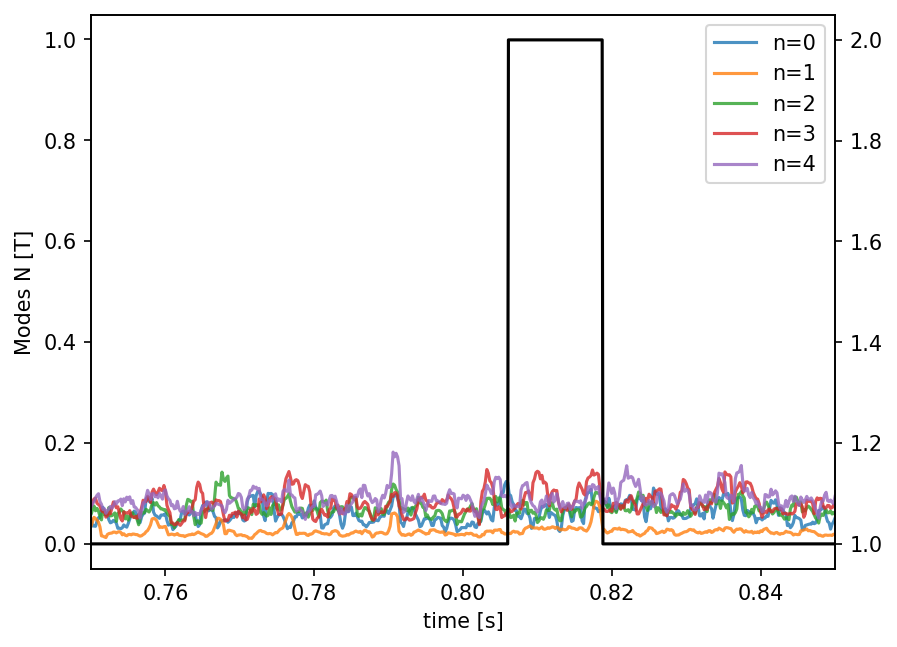

In [39]:
x_min = 0.75
x_max = 0.85
y_min = f[0]
y_max = f[-1]

fig, ax = plt.subplots()
ax.imshow(spec_odd[::, ::-1].T, extent=(t_spec[0], t_spec[-1], f[0], f[-1]), aspect='auto', cmap='jet', alpha=0.8)
ax.set_xlabel("time [s]")
ax.set_ylabel("frequency [Hz]")
ax.set_title('OddN')

ax1 = ax.twinx()
ax1.plot(label['time'], label['label'], color='black')
ax.axis([x_min, x_max, y_min, y_max])

fig.set_dpi(150)
plt.show()

fig, ax = plt.subplots()
ax.imshow(spec_even[::, ::-1].T, extent=(t_spec[0], t_spec[-1], f[0], f[-1]), aspect='auto', cmap='jet', alpha=0.8)
ax.set_xlabel("time [s]")
ax.set_ylabel("frequency [Hz]")
ax.set_title('EvenN')

ax1 = ax.twinx()
ax1.plot(label['time'], label['label'], color='black')
ax.axis([x_min, x_max, y_min, y_max])

fig.set_dpi(150)
plt.show()


fig, ax = plt.subplots()
for i in range(5):
    data = data_shot["y"]["modes"][f"N{i}"]
    ax.plot(t_mode, (data - np.nanmin(data)) /np.nanmax(data), label=f"n={i}", alpha=0.8)
ax.set_xlabel("time [s]")
ax.set_ylabel("Modes N [T]")
ax.legend()

ax1 = ax.twinx()
ax1.plot(label['time'], label['label'], color='black')

ax.set_xlim([x_min, x_max])
# ax.set_ylim(0, 0.2)

fig.set_dpi(150)

# ax.axis([t[0], t[-1], f[0], f[-1]])
plt.show()


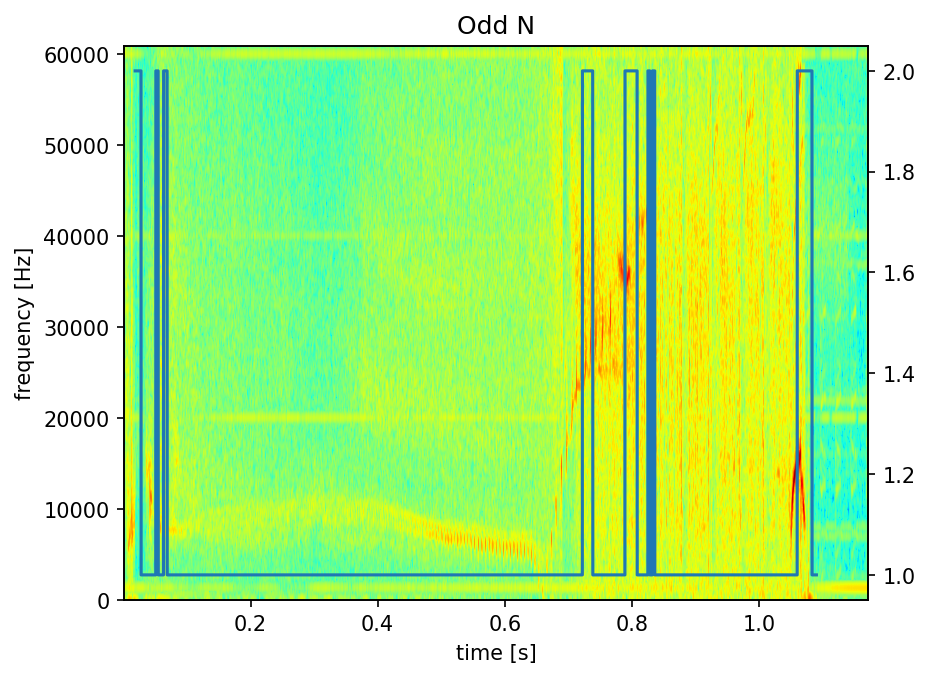

In [ ]:
f_zoomed = f[:500] # zoom in on first frequency range
spec_odd_zoomed = spec_odd[:, :500]
fig, ax = plt.subplots()
ax.imshow(spec_odd_zoomed[::, ::-1].T, extent=(t[0], t[-1], f_zoomed[0], f_zoomed[-1]), aspect='auto', cmap='jet')

ax.set_xlim(t[0], t[-1])
ax.set_ylim(f_zoomed[0], f_zoomed[-1])
ax.set_xlabel("time [s]")
ax.set_ylabel("frequency [Hz]")

ax1 = ax.twinx()
ax1.plot(label['time'], label['label'])

fig.set_dpi(150)
plt.title("Odd N")
plt.show()